# chatper 05. 이산형 확률변수

## 5.1 1차원 이산형 확률변수

In [1]:
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [2]:
# 확률변수가 취할 수 있는 값의 집합
x_set = np.array([1, 2, 3,  4, 5, 6])

In [3]:
def f(x):
    if x in x_set:
        return x / 21
    else:
        return 0

In [4]:
# 확률변수 X 정의
X = [x_set, f]

In [5]:
# 확률 p_k를 구한다
prob = np.array([f(x_k) for x_k in x_set])
# x_k와 p_k의 대응을 딕셔너리로 표시
dict(zip(x_set, prob))

{1: 0.048, 2: 0.095, 3: 0.143, 4: 0.190, 5: 0.238, 6: 0.286}

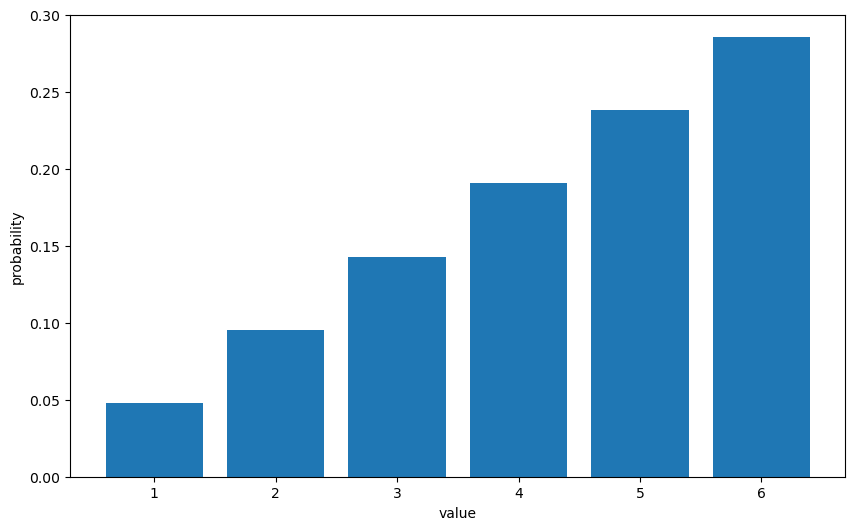

In [6]:
# 확률변수가 취할 수 있는 값과 확률의 대응을 막대그래프로 표시
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)   # <class 'matplotlib.axes._axes.Axes'>
ax.bar(x_set, prob)
ax.set_xlabel('value')
ax.set_ylabel('probability')
plt.show()

In [7]:
# np.all 함수 : 모든 요소가 참일 때만 참을 반환
np.all(prob >= 0)

True

In [8]:
# np.sum 함수 : 모든 요소의 합을 반환
np.sum(prob)

1.000

In [9]:
# 누적분포함수 (cumulative distribution function, CDF)
def F(x):
    return np.sum([f(x_k) for x_k in x_set if x_k <= x])

In [10]:
# 눈이 3 이하가 되는 확률
F(3)    # 소수점 세자리 까지만 출력된다.

0.286

In [11]:
# 확률변수 Y = 2X + 3
y_set = np.array([2 * x_k + 3 for x_k in x_set])
prob = np.array([f(x_k) for x_k in x_set])
dict(zip(y_set, prob))

{5: 0.048, 7: 0.095, 9: 0.143, 11: 0.190, 13: 0.238, 15: 0.286}

#### 5.1.2 1차원 이산형 확률변수의 지표

In [12]:
# 불공정한 주사위의 기대값
np.sum([x_k * f(x_k) for x_k in x_set])

4.333

In [13]:
# 불공정 주사위 100만 번 굴려서 얻은 실행값의 평균
sample = np.random.choice(x_set, int(1e6), p=prob)
np.mean(sample)

4.333

In [14]:
# 기대값 구하는 함수
def E(X, g=lambda x: x):
    x_set, f = X    # 언패킹
    return np.sum([g(x_k) * f(x_k) for x_k in x_set])

In [15]:
E(X)

4.333

In [16]:
# 확률변수 Y = 2X + 3 의 기대값
E(X, g=lambda x: 2*x + 3)

11.667

In [17]:
2 * E(X) + 3

11.667

In [18]:
# 분산 구하기
mean = E(X)
np.sum([(x_k - mean)**2 * f(x_k) for x_k in x_set]) # 편차 제곱의 합

2.222

In [19]:
# 분산 구하는 함수
def V(X, g=lambda x: x):
    x_set, f = X
    mean = E(X, g)
    return np.sum([(g(x_k)-mean)**2 * f(x_k) for x_k in x_set])

In [20]:
# g를 지정하지 않을 시, 확률변수 X의 분산을 계산
V(X)

2.222

In [21]:
# 확률변수 Y = 2X + 3의 분산
V(X, lambda x: 2*x+3)

8.889

In [22]:
# 분산의 공식
# V(aX + b) = a*aV(X)
2**2 * V(X)

8.889

## 5.2 2차원 이산형 확률변수

In [23]:
# 확률변수 X : 불공정한 주사위 A, B 눈의 합
# 확률변수 Y : 불공정한 주사위 A 눈
x_set = np.arange(2, 13)    # [ 2  3  4  5  6  7  8  9 10 11 12
y_set = np.arange(1, 7)     # [1 2 3 4 5 6]

In [24]:
# 결합확률함수
def f_XY(x, y):
    if 1 <= y <= 6 and 1 <= x-y <= 6:
        return y * (x-y) / 441
    else:
        return 0

In [25]:
# 확률변수 (X, Y)의 움직임
XY = [x_set, y_set, f_XY]

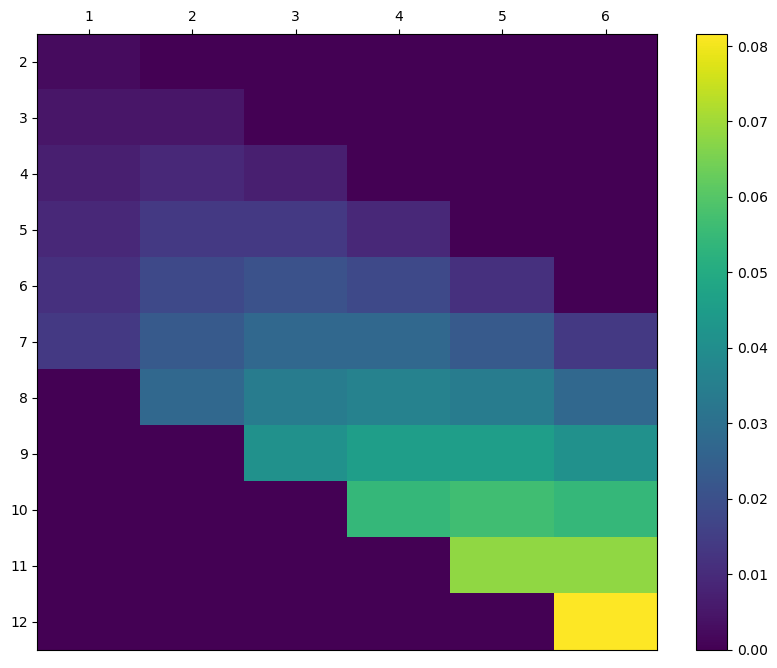

In [50]:
# 확률분포를 히트맵으로 그리기
prob = np.array([[f_XY(x_i, y_j) for y_j in y_set] for x_i in x_set])

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111)

c = ax.pcolor(prob)
ax.set_xticks(np.arange(prob.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(prob.shape[0]) + 0.5, minor=False)
ax.set_xticklabels(np.arange(1, 7), minor=False)
ax.set_yticklabels(np.arange(2, 13), minor=False)
# y축을 내림차순의 숫자가 되게 하여, 위 아래를 역전시킨다.
ax.invert_yaxis()
# x축 눈금을 그래프 위쪽에 표시
ax.xaxis.tick_top()
fig.colorbar(c, ax=ax)
plt.show()

In [27]:
# 확률이 반드시 0 이상인지 확인
np.all(prob >= 0)

True

In [28]:
# 확률의 총합이 1인지 확인
np.sum(prob)

1.000

In [29]:
# 주변확률분포 (marginal probability distribution)
def f_X(x):
    # X의 주변확룰분포
    return np.sum([f_XY(x, y_k) for y_k in y_set])

def f_Y(y):
    # Y의 주변확률분포
    return np.sum([f_XY(x_k, y) for x_k in x_set])

In [30]:
X = [x_set, f_X]
Y = [y_set, f_Y]

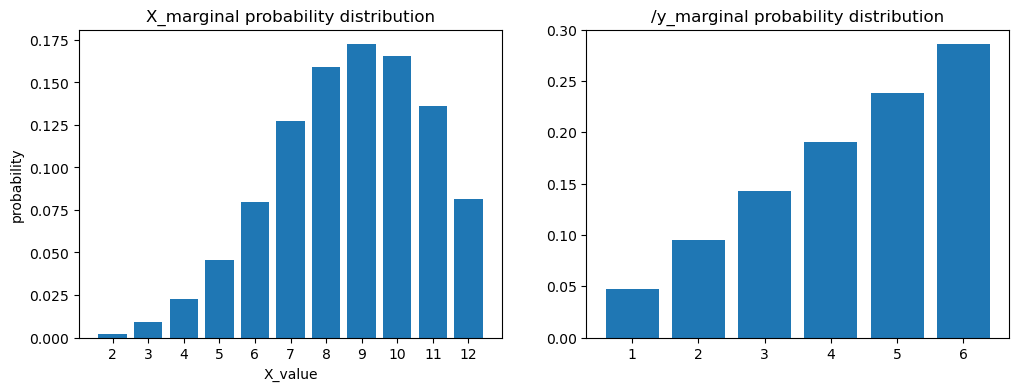

In [31]:
# X의 확률분포, Y의 확률분포
prob_x = np.array([f_X(x_k) for x_k in x_set])
prob_y = np.array([f_Y(y_k) for y_k in y_set])

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

ax1.bar(x_set, prob_x)
ax1.set_title("X_marginal probability distribution")
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')
ax1.set_xticks(x_set)

ax2.bar(y_set, prob_y)
ax2.set_title("/y_marginal probability distribution")
ax1.set_xlabel('X_value')
ax1.set_ylabel('probability')

plt.show()

#### 5.2.2 2차원 이산형 확률변수의 지표

In [32]:
np.sum([x_i * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

8.667

In [33]:
def E(XY, g):
    x_set, y_set, f_XY = XY
    return np.sum([g(x_i, y_j) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [34]:
mean_X = E(XY, lambda x, y: x)
mean_X

8.667

In [35]:
mean_Y = E(XY, lambda x, y :y)
mean_Y

4.333

In [36]:
a, b = 2, 3

In [37]:
# E(2X + 3)
E(XY, lambda x, y: a*x +b*y)

30.333

In [38]:
# 2*E(X) + 3
a * mean_X + b * mean_Y

30.333

In [39]:
# 분산
np.sum([(x_i - mean_X)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

4.444

In [40]:
def V(XY, g):
    x_set, y_set, f_XY = XY
    mean = E(XY, g)
    return np.sum([(g(x_i, y_j)-mean)**2 * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [41]:
var_X = V(XY, g=lambda x, y: x)
var_X

4.444

In [42]:
var_Y = V(XY, g=lambda x, y: y)
var_Y

2.222

In [43]:
# 공분산
def Cov(XY):
    x_set, y_set, f_XY = XY
    mean_X = E(XY, lambda x, y: x)
    mean_Y = E(XY, lambda x, y: y)
    return np.sum([(x_i - mean_X) * (y_j - mean_Y) * f_XY(x_i, y_j) for x_i in x_set for y_j in y_set])

In [44]:
cov_xy = Cov(XY)
cov_xy

2.222

In [45]:
# V(2X+3Y)
V(XY, lambda x, y: a*x + b*y)

64.444

In [46]:
# 4V(X) + 9V(Y) + 2*2*3*Cov(X, Y)
a**2 * var_X + b**2 * var_Y + 2*a*b * cov_xy

64.444

In [47]:
# 상관계수
cov_xy / (np.sqrt(var_X) * np.sqrt(var_Y))

0.707